### Pandas : Dataframe으로 데이터 불러오기
read_csv() : **데이터프레임** 형식으로 데이터 파일 불러오기 

In [3]:
import pandas as pd
csv_test = pd.read_csv("./res/test_csv_file.csv")
csv_test

,ID,LAST_NAME,AGE
0,1,KIM,30
1,2,CHOI,25
2,3,LEE,41
3,4,PARK,19
4,5,LIM,36


### Pandas : Dataframe으로 불러와서 header 처리

In [7]:
# txt_test = pd.read_csv("./res/test_text_file.txt", sep="|", index_col=0) 
# txt_test = pd.read_csv("./res/test_text_file.txt", sep="|", index_col="id") # Error 대소문자 구분
txt_test = pd.read_csv("./res/test_text_file.txt", sep="|", index_col="ID") 
txt_test

,A,B,C,D
ID,,,,
C1,1,2,3,4
C2,5,6,7,8
C3,1,3,5,7


행 index = 0, 1, 2 → 데이터 구분자, 참조 위치<br>
열 index = ID, A, B, C, D → ID가 구분자로 있으므로 행 index(default)가 필요없다<br>
pd.read_csv(경로, sep=구분자, **index_col**=행 index로 사용할 col의 index, col name)

In [17]:
# header가 없는 데이터에 header 부여
text = pd.read_csv("./res/text_without_column_name.txt", sep="|", header=None, names=["ID", "A", "B", "C", "D"]) 
text

,ID,A,B,C,D
0,C1,1,2,3,4
1,C2,5,6,7,8
2,C3,1,3,5,7


In [18]:
type(text)
text.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
ID    3 non-null object
A     3 non-null int64
B     3 non-null int64
C     3 non-null int64
D     3 non-null int64
dtypes: int64(4), object(1)
memory usage: 200.0+ bytes


**[중요] info()** : Pandas에서 dataframe의 정보를 볼수있는 함수. R에서는 structure() 사용 <br>
object : string → string 객체가 따로 없음<br><br>

### Pandas : 데이터 저장

In [19]:
data = {"ID": ["A1", "A2", "A3"],
       "X1": [10, 20, 30],
       "X2": [1.1, 2.2, 3.3]}

In [21]:
df = pd.DataFrame(data, index=["a1", "a2", "a3"]) # 행 index 지정
df

,ID,X1,X2
a1,A1,10,1.1
a2,A2,20,2.2
a3,A3,30,3.3


In [24]:
# 데이터프레임에 행 추가(index 사용)
df2 = df.reindex(["a1", "a2", "a3", "a4"])
df2 

,ID,X1,X2
a1,A1,10.0,1.1
a2,A2,20.0,2.2
a3,A3,30.0,3.3
a4,NaN,NaN,NaN


Pandas NaN(=결측값, 값이 없다), Deep Nan(inf → 발산, 학습과정에서 learning rate 조정이 필요)
1. 정말 데이터가 없는 경우
2. 사용자가 데이터를 누락한 경우
3. 인위적으로 결측값으로 지정하는 경우

In [25]:
df2.to_csv("./res/dt2.csv")

![1.png]("./asset/1.PNG")

In [31]:
df2.to_csv("./res/dt2_.csv", sep="?")

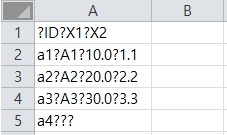

In [29]:
df2.to_csv("./res/dt2_.csv", sep=",") # sep="," 생략 가능

In [33]:
df2.to_csv("./res/dt2.csv", sep=",", na_rep="NaN") # na_rep : NaN자리에 대체할 텍스트

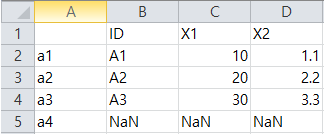

### DataFrame의 속성

In [38]:
import numpy as np
df1 = pd.DataFrame(np.arange(12).reshape(3, 4),
                  index=["r0", "r1", "r2"],
                  columns=["c0", "c1", "c2", "c3"]) 
# 데이터를 12개를 생성해서 3X4행으로 바꾼 뒤 dataframe 형식으로 변경
df1

,c0,c1,c2,c3
r0,0,1,2,3
r1,4,5,6,7
r2,8,9,10,11


In [37]:
df1.T

,r0,r1,r2
c0,0,4,8
c1,1,5,9
c2,2,6,10
c3,3,7,11


In [42]:
df1.axes

[Index(['r0', 'r1', 'r2'], dtype='object'),
 Index(['c0', 'c1', 'c2', 'c3'], dtype='object')]

In [43]:
df1.dtypes

c0    object
c1    object
c2    object
c3    object
dtype: object

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, r0 to r2
Data columns (total 4 columns):
c0    3 non-null object
c1    3 non-null object
c2    3 non-null object
c3    3 non-null object
dtypes: object(4)
memory usage: 120.0+ bytes


In [45]:
df1.shape

(3, 4)

In [46]:
df1.size # 요소 개수

12

### Pandas : 데이터 추출

In [52]:
df2 = pd.DataFrame({"c1": ["a", "a", "b", "b", "c"],
                   "V1": np.arange(5),
                   "V2": np.random.randn(5)},
                  index=["r0", "r1", "r2", "r3", "r4"]) 
df2

,c1,V1,V2
r0,a,0,-1.966041
r1,a,1,0.431947
r2,b,2,0.680758
r3,b,3,0.639052
r4,c,4,-0.564201


In [53]:
df2.index

Index(['r0', 'r1', 'r2', 'r3', 'r4'], dtype='object')

In [61]:
df2.ix[2:]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,c1,V1,V2
r2,b,2,0.680758
r3,b,3,0.639052
r4,c,4,-0.564201


In [62]:
df2.ix[2] # 특정 행 추출

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


c1           b
V1           2
V2    0.680758
Name: r2, dtype: object

In [63]:
df2.ix["r2"]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


c1           b
V1           2
V2    0.680758
Name: r2, dtype: object

ix 사용 시, 행 index 이름, 행 index 첨자 모두 사용 가능